In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn.objects as so

In [ ]:
EV= pd.read_csv("https://raw.githubusercontent.com/odu-cs625-datavis/fall23-asv-Rupa42/main/Electric_Vehicle_Population_deleted_cols.csv?token=GHSAT0AAAAAACKXYHX6YZBVV2E4XZ26QEI6ZLQFBHA")

In [ ]:
EV.columns

Index(['VIN (1-10)', 'County', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP'],
      dtype='object')

In [ ]:
EV = EV.rename(columns={'Model Year': 'Year', 'Base MSRP':'BasePrice'})

In [ ]:
EV.dtypes

VIN (1-10)                                           object
County                                               object
Year                                                  int64
Make                                                 object
Model                                                object
Electric Vehicle Type                                object
Clean Alternative Fuel Vehicle (CAFV) Eligibility    object
Electric Range                                        int64
BasePrice                                             int64
dtype: object

In [ ]:
EV.head()

,VIN (1-10),County,Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,BasePrice
0,JTMEB3FV6N,Monroe,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0
1,1G1RD6E45D,Clark,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0
2,JN1AZ0CP8B,Yakima,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0
3,1G1FW6S08H,Skagit,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0
4,3FA6P0SU1K,Snohomish,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0


In [ ]:
EV2 = EV.loc[EV['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

In [ ]:
EV2 = EV2[['Make', 'Model', 'Electric Range']]


In [ ]:
EV2

,Make,Model,Electric Range
2,NISSAN,LEAF,73
3,CHEVROLET,BOLT EV,238
5,TESLA,MODEL 3,215
6,NISSAN,LEAF,75
7,NISSAN,LEAF,75
...,...,...,...
112623,TESLA,MODEL Y,0
112625,FORD,MUSTANG MACH-E,0
112626,TESLA,MODEL 3,0
112629,TESLA,MODEL Y,0


In [ ]:
max_range = EV2.groupby( ['Make','Model']).max()

In [ ]:
max_range = max_range[max_range['Electric Range'] > 1] #filter out bad data.


In [ ]:
top_ten_range = max_range[max_range['Electric Range'] > 100].nlargest(10, 'Electric Range', keep='first')

In [ ]:
top_ten_range

Electric Range
Make      Model                   
TESLA     MODEL S              337
          MODEL 3              322
          MODEL X              293
          MODEL Y              291
CHEVROLET BOLT EV              259
HYUNDAI   KONA                 258
TESLA     ROADSTER             245
KIA       NIRO                 239
JAGUAR    I-PACE               234
POLESTAR  PS2                  233

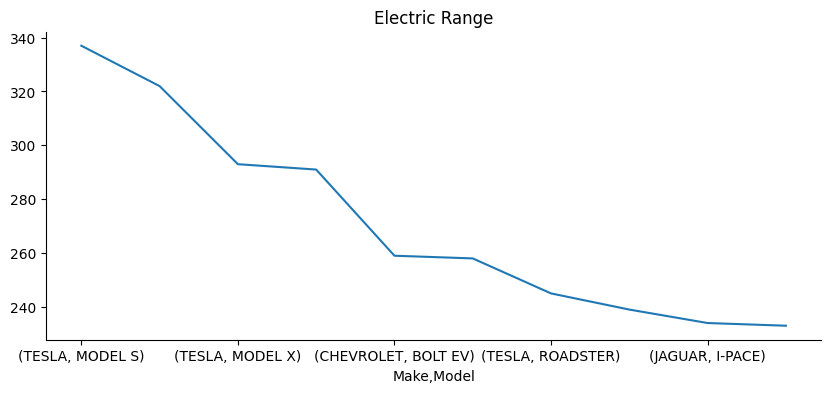

In [ ]:
from matplotlib import pyplot as plt
top_ten_range['Electric Range'].plot(kind='line', figsize=(10, 4), title='Electric Range')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
top_2018_2022 = EV.loc[EV['Year'] > 2017 ].loc[EV['Year'] < 2023 ].groupby(['Make']).size().reset_index(name='counts')

In [ ]:
top_2018_2022.nlargest(7, 'counts', keep='first')

,Make,counts
26,TESLA,45096
20,NISSAN,4725
4,CHEVROLET,4375
12,KIA,3765
2,BMW,2672
27,TOYOTA,2519
7,FORD,2503


In [ ]:
sum_top_7 = top_2018_2022.loc[top_2018_2022['Make'].isin(['TESLA', 'NISSAN','CHEVROLET',
                                                         'KIA',]), 'counts'].sum()

In [ ]:
other_makes_besides_top_7 = (top_2018_2022['counts'].sum()) - sum_top_7

In [ ]:
other_makes_besides_top_7

22483

In [ ]:
top_2018_2022.loc[len(top_2018_2022.index)] = ['Other Makes', other_makes_besides_top_7]

In [ ]:
top_2018_2022 = top_2018_2022.loc[top_2018_2022['Make'].isin(['TESLA', 'NISSAN', 'CHEVROLET',
                                                         'KIA', 'Other Makes']) ]

In [ ]:
top_2018_2022.set_index('Make', inplace=True)

In [ ]:
top_2018_2022 = top_2018_2022.sort_values(by='counts', ascending=False)

In [ ]:
top_2018_2022

,counts
Make,
TESLA,45096
Other Makes,22483
NISSAN,4725
CHEVROLET,4375
KIA,3765


In [ ]:
filtered_year = EV.loc[EV['Year'] < 2023].loc[EV['Year'] > 2012]

total_yearly_count = filtered_year.groupby(['Make', 'Year']).size().reset_index(name='counts')

In [ ]:
total_yearly_count

,Make,Year,counts
0,AUDI,2016,214
1,AUDI,2017,187
2,AUDI,2018,174
3,AUDI,2019,392
4,AUDI,2020,224
...,...,...,...
168,VOLVO,2018,226
169,VOLVO,2019,190
170,VOLVO,2020,162
171,VOLVO,2021,580


In [ ]:
total_yearly_count = total_yearly_count.pivot_table(values='counts', index='Year', columns='Make')

In [ ]:
total_yearly_count

Make,AUDI,BENTLEY,BMW,CADILLAC,CHEVROLET,CHRYSLER,FIAT,FORD,HONDA,HYUNDAI,...,NISSAN,POLESTAR,PORSCHE,RIVIAN,SMART,SUBARU,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
Year,,,,,,,,,,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,818.0,NaN,106.0,662.0,NaN,NaN,...,1966.0,NaN,NaN,NaN,29.0,NaN,814.0,296.0,NaN,NaN
2014,NaN,NaN,457.0,58.0,724.0,NaN,97.0,628.0,9.0,NaN,...,694.0,NaN,8.0,NaN,71.0,NaN,683.0,215.0,NaN,NaN
2015,NaN,NaN,403.0,NaN,467.0,NaN,242.0,556.0,NaN,NaN,...,1839.0,NaN,33.0,NaN,52.0,NaN,1089.0,89.0,124.0,NaN
2016,214.0,NaN,383.0,18.0,309.0,NaN,148.0,778.0,NaN,44.0,...,1208.0,NaN,78.0,NaN,31.0,NaN,1639.0,NaN,319.0,112.0
2017,187.0,NaN,692.0,15.0,2744.0,94.0,167.0,659.0,NaN,46.0,...,934.0,NaN,71.0,NaN,34.0,NaN,1679.0,899.0,52.0,115.0
2018,174.0,NaN,710.0,17.0,1126.0,554.0,53.0,170.0,614.0,20.0,...,1232.0,NaN,78.0,NaN,47.0,NaN,7919.0,659.0,39.0,226.0
2019,392.0,NaN,279.0,NaN,966.0,119.0,9.0,136.0,73.0,116.0,...,1409.0,NaN,62.0,NaN,9.0,58.0,4583.0,190.0,495.0,190.0
2020,224.0,1.0,143.0,NaN,1014.0,286.0,NaN,65.0,79.0,212.0,...,580.0,NaN,143.0,NaN,NaN,NaN,7018.0,311.0,NaN,162.0
2021,544.0,1.0,635.0,NaN,377.0,504.0,NaN,882.0,17.0,187.0,...,534.0,98.0,145.0,NaN,NaN,NaN,11028.0,935.0,988.0,580.0


In [ ]:
tesla_vs_others = (total_yearly_count
                    .assign(other_EVS = total_yearly_count
                            .drop("TESLA", axis=1).sum(axis=1))
                    .loc[:, ["TESLA", "other_EVS"]]
                    .astype({"TESLA": "float64"})
                   )


tesla_vs_others.head(100)


Make,TESLA,other_EVS
Year,,
2013,814.0,3877.0
2014,683.0,3002.0
2015,1089.0,3851.0
2016,1639.0,4096.0
2017,1679.0,6965.0
2018,7919.0,6327.0
2019,4583.0,5683.0
2020,7018.0,4020.0
2021,11028.0,7336.0


In [ ]:
axes_settings = {
    "spines.top": False,
    "spines.right": False,
    #"facecolor": (0, 0, 0, .1),
    #"facealpha":.4,
    #"grid": True,
    #"grid.axis": 'y'
}

plt.rc("axes", **axes_settings)

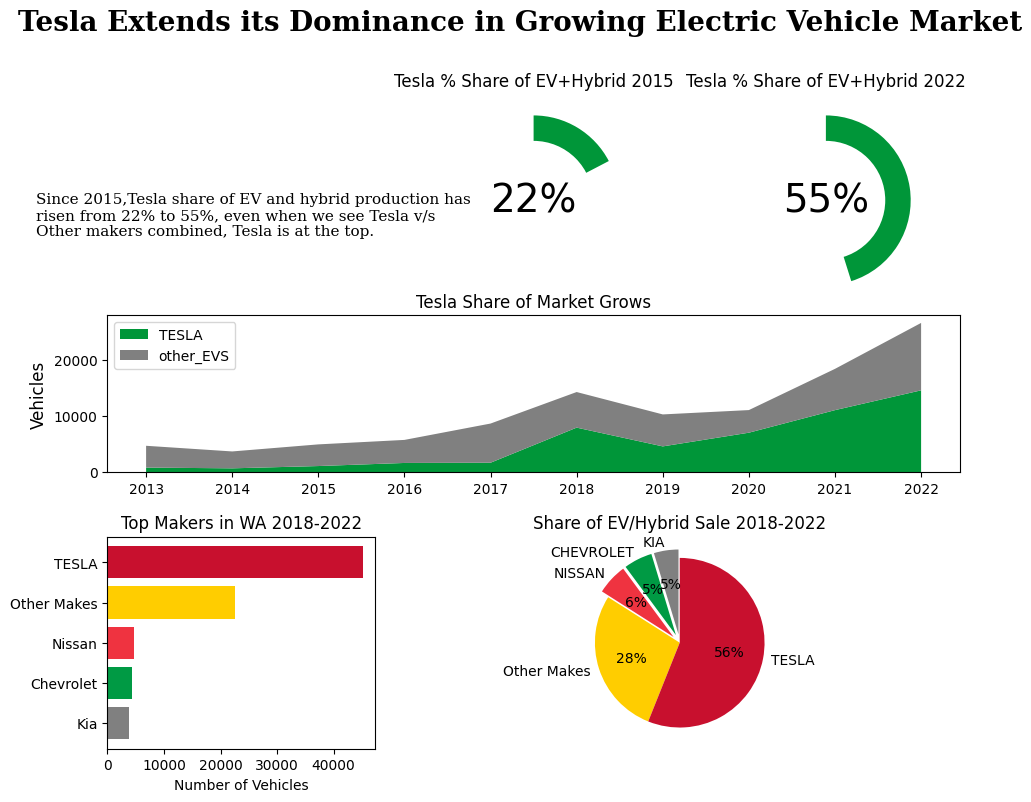

In [ ]:
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(11, 8.5))

gs = gridspec.GridSpec(nrows=12, ncols=6 )

fig.suptitle("Tesla Extends its Dominance in Growing Electric Vehicle Market",
             fontsize=20,
             fontweight="bold",
             fontfamily='serif'
            )

fig.text(.06, .695,
'''
Since 2015,Tesla share of EV and hybrid production has
risen from 22% to 55%, even when we see Tesla v/s
Other makers combined, Tesla is at the top.
'''
, fontsize=11, fontweight='light', fontfamily='serif')

ax1 = fig.add_subplot(gs[0:4, 2:4])


ax1.pie(
    tesla_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["White", "#009639"]
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

plt.text(
        0,
    0,
    f"{round((tesla_vs_others.loc[2015, 'TESLA'] / tesla_vs_others.loc[2015].sum()*100))}%",
    ha='center',
    va='center',
    fontsize=28
)


ax1.set_title("Tesla % Share of EV+Hybrid 2015", fontsize=12)


ax2 = fig.add_subplot(gs[0:4, 4:])


ax2.pie(
    tesla_vs_others.iloc[-1].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["White", "#009639"]
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

plt.text(
    0,
    0,
    f"{round((tesla_vs_others.loc[2022, 'TESLA'] / tesla_vs_others.loc[2022].sum()*100))}%",
    ha='center',
    va='center',
    fontsize=28
)


ax2.set_title("Tesla % Share of EV+Hybrid 2022", fontsize=12)



ax3 = fig.add_subplot(gs[4:7, :])

ax3.stackplot(
    tesla_vs_others.index.astype("string"),
    tesla_vs_others["TESLA"],
    tesla_vs_others["other_EVS"],
    labels=["TESLA", "other_EVS"],
    colors=["#009639", "grey"]
)
ax3.set_title("Tesla Share of Market Grows")

ax3.set_ylabel("Vehicles", fontsize=12)


ax3.legend(loc="upper left")

ax4 = fig.add_subplot(gs[8:, 0:2])

ax4.barh(y=top_2018_2022.index[::-1],
        width = top_2018_2022['counts'][::-1],
        color=["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E"]
         )


positions = list(range(5))
labels = ["TESLA", "Other Makes", "Nissan", "Chevrolet", "Kia"][::-1]

ax4.set_title("Top Makers in WA 2018-2022")
ax4.set_xlabel("Number of Vehicles", fontsize=10)
ax4.set_yticks(positions)
ax4.set_yticklabels(labels)



ax5 = fig.add_subplot(gs[8:, 2:])

ax5.pie(top_2018_2022['counts'].to_numpy()[::-1],
       autopct="%.0f%%",
       labels=list(top_2018_2022.index[::-1]),
        startangle=90,
       colors = ["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E", "#009639", "#C8102E", ],
       explode=(.1, .1, .1, 0, 0))

ax5.set_title("Share of EV/Hybrid Sale 2018-2022")

plt.show()

fig.savefig('EVMarket.png', bbox_inches='tight', facecolor="white")